Количество цветов влияет на количество каналов во входном слое нейронной сети, где каждый канал представляет цветовую информацию. Количество классов, с другой стороны, определяет количество нейронов в выходном слое, каждый из которых соответствует одному классу. Функция активации выходного слоя часто выбирается в зависимости от задачи, с softmax для классификации. Функция потерь также зависит от количества классов, например, categorical_crossentropy для многоклассовой классификации. Все эти факторы тесно связаны с размерностью входных и выходных данных и важны при проектировании нейронных сетей для разных задач, включая цветную классификацию изображений.

Входной слой принимает изображения с количеством каналов, зависящим от кол-ва цветов на пиксель. Сверточные слои извлекают признаки с помощью фильтров, и выбор количества и размера фильтров зависит от задачи и данных. Слои объединения уменьшают размер признаковых карт. Полносвязанные слои выполняют классификацию на количество классов, и функция активации на последнем слое обычно softmax. Функция потерь, оптимизатор и скорость обучения влияют на обучение, а размер пакета и количество эпох важны для эффективности обучения. Подбор гиперпараметров требует экспериментов для достижения наилучших результатов для каждой модели.

Сначала создаем модель

In [1]:
import os
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

def create_model(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def train_model(model, x_train, y_train, batch_size, num_classes, epochs):
    x_train = x_train.astype('float32') / 255.0
    y_train = to_categorical(y_train, num_classes)
    
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)


def evaluate_model(model, x_test, y_test):
    x_test = x_test.astype('float32') / 255.0

    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    
    print(classification_report(y_test, predicted_classes))
    

Создаем модель и обучаем на 20 классах

In [2]:
(x_train_20, y_train_20), (x_test_20, y_test_20) = cifar100.load_data(label_mode="coarse")

if os.path.isfile('model_20.keras'):
    model_20 = load_model('model_20.keras')
else:
    model_20 = create_model(num_classes=20)

train_model(model_20, x_train_20, y_train_20, batch_size=64, num_classes=20, epochs=1)

model_20.save('model_20.keras')

782/782 [==============================] - 94s 117ms/step - loss: 2.9187 - accuracy: 0.1017


оцениваем модель для 20 классов

In [3]:
evaluate_model(model_20, x_test_20, y_test_20)

313/313 [==============================] - 25s 75ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.08      0.40      0.14       500
           2       0.20      0.05      0.08       500
           3       0.14      0.01      0.03       500
           4       0.15      0.02      0.04       500
           5       0.14      0.12      0.13       500
           6       0.20      0.00      0.00       500
           7       0.10      0.50      0.17       500
           8       0.00      0.00      0.00       500
           9       0.00      0.00      0.00       500
          10       0.47      0.37      0.42       500
          11       0.09      0.10      0.09       500
          12       0.04      0.00      0.01       500
          13       0.22      0.01      0.02       500
          14       0.12      0.25      0.16       500
          15       0.00      0.00      0.00       500
          16       0.00 

C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Создаем модель и обучаем на 100 классах

In [4]:
(x_train_100, y_train_100), (x_test_100, y_test_100) = cifar100.load_data(label_mode="fine")

if os.path.isfile('model_100.keras'):
    model_100 = load_model('model_100.keras')
else:
    model_100 = create_model(num_classes=100)

train_model(model_100, x_train_100, y_train_100, batch_size=64, num_classes=100, epochs=1)

model_100.save('model_100.keras')

782/782 [==============================] - 97s 120ms/step - loss: 4.5717 - accuracy: 0.0166


оцениваем модель на 100 классов

In [5]:
evaluate_model(model_100, x_test_100, y_test_100)

313/313 [==============================] - 25s 78ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.01      0.16      0.02       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00 

C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Проверили что все работает, обучим еще

In [6]:
train_model(model_20, x_train_20, y_train_20, batch_size=64, num_classes=20, epochs=10)
train_model(model_100, x_train_100, y_train_100, batch_size=64, num_classes=100, epochs=10)

Epoch 1/10
782/782 [==============================] - 96s 122ms/step - loss: 2.7965 - accuracy: 0.1392
Epoch 2/10
782/782 [==============================] - 93s 119ms/step - loss: 2.7482 - accuracy: 0.1555
Epoch 3/10
782/782 [==============================] - 93s 119ms/step - loss: 2.7076 - accuracy: 0.1669
Epoch 4/10
782/782 [==============================] - 94s 120ms/step - loss: 2.6816 - accuracy: 0.1783
Epoch 5/10
782/782 [==============================] - 98s 125ms/step - loss: 2.6542 - accuracy: 0.1877
Epoch 6/10
782/782 [==============================] - 100s 128ms/step - loss: 2.6340 - accuracy: 0.1923
Epoch 7/10
782/782 [==============================] - 94s 120ms/step - loss: 2.6169 - accuracy: 0.1984
Epoch 8/10
782/782 [==============================] - 96s 122ms/step - loss: 2.6018 - accuracy: 0.2030
Epoch 9/10
782/782 [==============================] - 94s 120ms/step - loss: 2.5920 - accuracy: 0.2073
Epoch 10/10
782/782 [==============================] - 94s 121ms/step - 

Посмотрим резуьтат обучения

Результат обучения на 20 супер классах спустя еще 10 эпох

In [8]:
evaluate_model(model_20, x_test_20, y_test_20)

313/313 [==============================] - 24s 78ms/step
              precision    recall  f1-score   support

           0       0.15      0.08      0.11       500
           1       0.35      0.07      0.12       500
           2       0.14      0.57      0.23       500
           3       0.18      0.29      0.22       500
           4       0.38      0.15      0.22       500
           5       0.20      0.11      0.14       500
           6       0.29      0.17      0.22       500
           7       0.20      0.30      0.24       500
           8       0.14      0.21      0.17       500
           9       0.36      0.13      0.19       500
          10       0.42      0.60      0.50       500
          11       0.16      0.15      0.15       500
          12       0.16      0.13      0.14       500
          13       0.12      0.13      0.13       500
          14       0.18      0.11      0.14       500
          15       0.16      0.07      0.10       500
          16       0.16 

Результат обучения на 100 классах спустя еще 10 эпох

In [9]:
evaluate_model(model_100, x_test_100, y_test_100)

313/313 [==============================] - 25s 79ms/step
              precision    recall  f1-score   support

           0       0.01      0.04      0.01       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.02      0.04      0.03       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.01      0.01      0.01       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.02      0.23      0.04       100
          15       0.00      0.00      0.00       100
          16       0.00 

C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


попробуем улучшить показания обучения на 100 классах прогнав еще 100 эпох

In [10]:
train_model(model_100, x_train_100, y_train_100, batch_size=64, num_classes=100, epochs=100)
evaluate_model(model_100, x_test_100, y_test_100)

Epoch 1/100
782/782 [==============================] - 93s 119ms/step - loss: 4.3558 - accuracy: 0.0375
Epoch 2/100
782/782 [==============================] - 100s 128ms/step - loss: 4.3491 - accuracy: 0.0383
Epoch 3/100
782/782 [==============================] - 97s 124ms/step - loss: 4.3433 - accuracy: 0.0401
Epoch 4/100
782/782 [==============================] - 97s 124ms/step - loss: 4.3402 - accuracy: 0.0405
Epoch 5/100
782/782 [==============================] - 98s 125ms/step - loss: 4.3345 - accuracy: 0.0396
Epoch 6/100
782/782 [==============================] - 96s 122ms/step - loss: 4.3326 - accuracy: 0.0395
Epoch 7/100
782/782 [==============================] - 98s 126ms/step - loss: 4.3297 - accuracy: 0.0415
Epoch 8/100
782/782 [==============================] - 99s 127ms/step - loss: 4.3253 - accuracy: 0.0422
Epoch 9/100
782/782 [==============================] - 97s 124ms/step - loss: 4.3235 - accuracy: 0.0425
Epoch 10/100
782/782 [==============================] - 95s 121

C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Точность больше чем 1/100, а значит вероятность предсказания выше, чем если бы мы всегда выбирали одно и тоже или выбирали наугад, поэтому сохраним модель.

In [11]:
model_100.save('model_100.keras')


In [97]:
class_names_20 = ['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
                  'household electrical devices', 'household furniture', 'insects', 'large carnivores',
                  'large man-made outdoor things',
                  'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals',
                  'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1',
                  'vehicles 2']

class_names_100 = ["beaver", "dolphin", "otter", "seal", "whale", "aquarium fish", "flatfish", "ray", "shark",
                   "trout",
                   "orchids", "poppies", "roses", "sunflowers", "tulips", "bottles", "bowls", "cans", "cups", "plates",
                   "apples", "mushrooms", "oranges", "pears", "sweet peppers", "clock", "computer keyboard", "lamp",
                   "telephone", "television", "bed", "chair", "couch", "table", "wardrobe", "bee", "beetle",
                   "butterfly", "caterpillar", "cockroach", "bear", "leopard", "lion", "tiger", "wolf", "bridge",
                   "castle", "house", "road", "skyscraper", "cloud", "forest", "mountain", "plain", "sea", "camel",
                   "cattle", "chimpanzee", "elephant", "kangaroo", "fox", "porcupine", "possum", "raccoon", "skunk",
                   "crab", "lobster", "snail", "spider", "worm", "baby", "boy", "girl", "man", "woman", "crocodile",
                   "dinosaur", "lizard", "snake", "turtle", "hamster", "mouse", "rabbit", "shrew", "squirrel", "maple",
                   "oak", "palm", "pine", "willow", "bicycle", "bus", "motorcycle", "pickup truck", "train",
                   "lawn-mower", "rocket", "streetcar", "tank", "tractor"
                   ]


In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

def get_report(model, x_test, y_test):
    x_test = x_test.astype('float32') / 255.0

    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    
    return classification_report(y_test, predicted_classes, output_dict=True)

report_20 = get_report(model_20, x_test_20, y_test_20)
report_100 = get_report(model_100, x_test_100, y_test_100)

313/313 [==============================] - 25s 81ms/step


C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kongz\PycharmProjects\exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


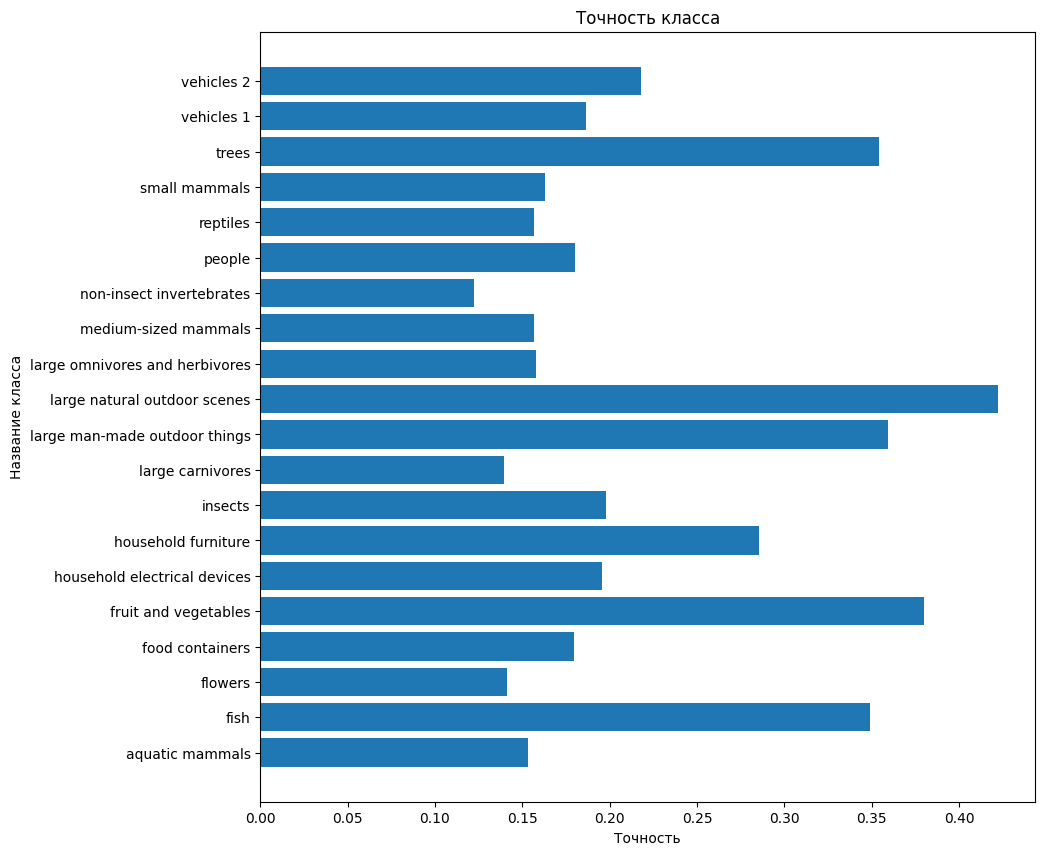

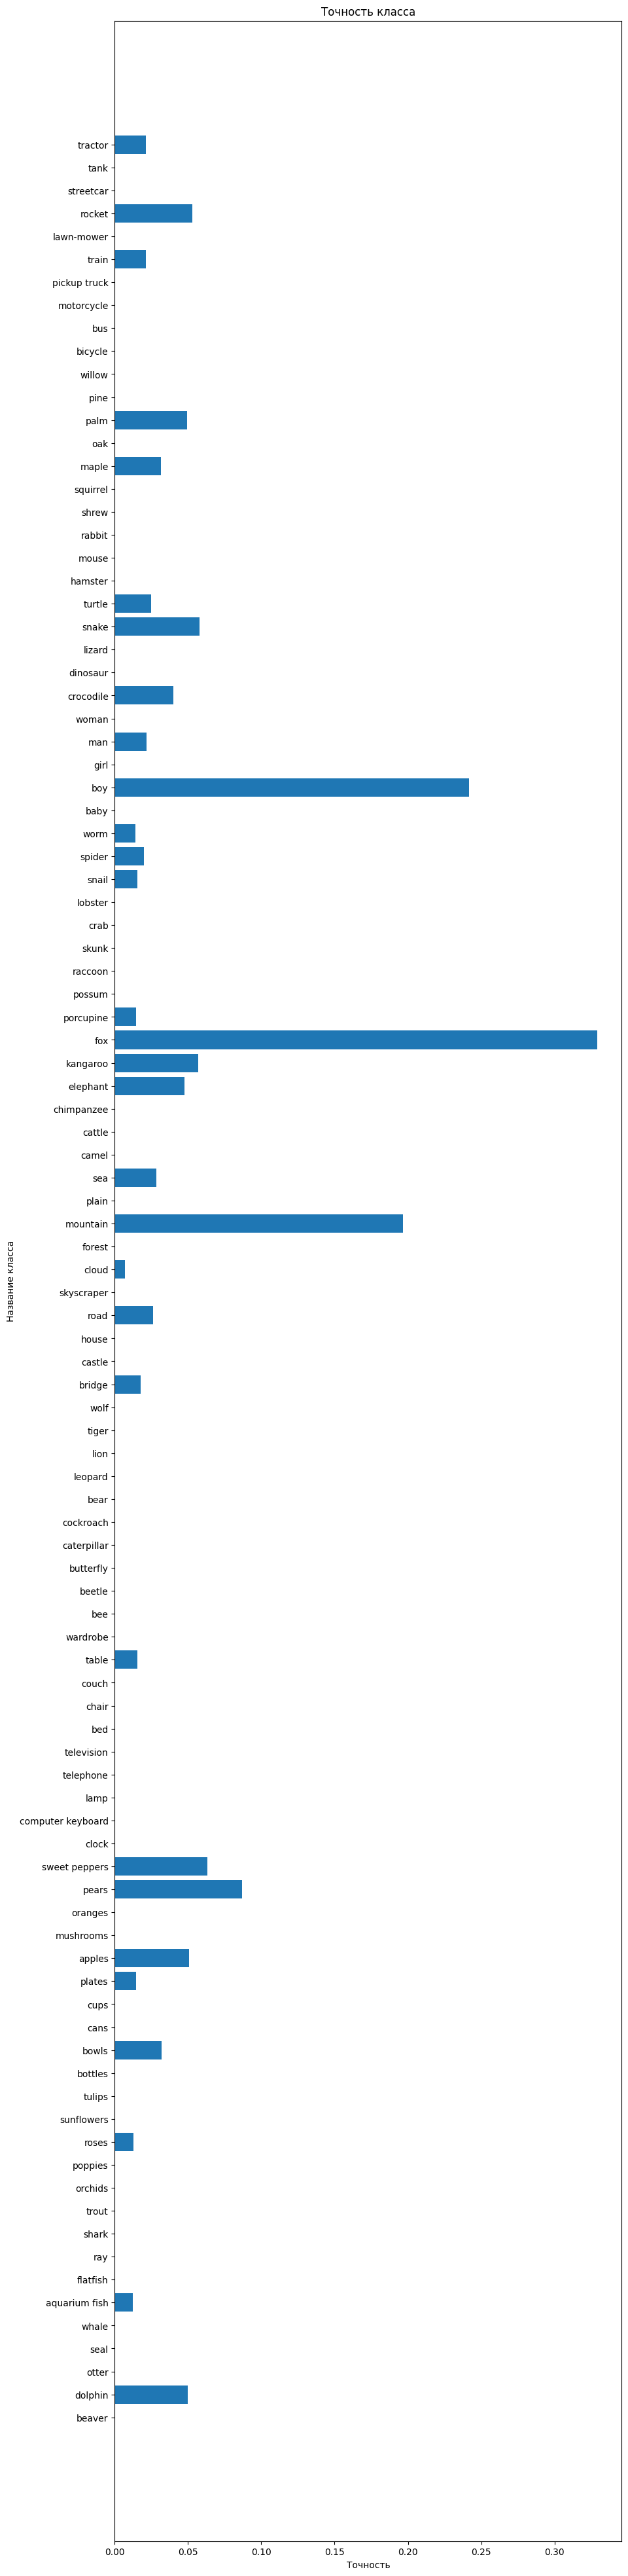

In [154]:
import matplotlib.pyplot as plt


def make_data(class_names, report):
    length = len(class_names)
    data = {}
    for i in range(length):
        data[class_names[i]] = report[str(i)]['precision']
    return data

data_20 = make_data(class_names_20, report_20)
data_100 = make_data(class_names_100, report_100)



def visualize(data, names):
    class_numbers = list(data.keys())
    precisions = list(data.values())
    num_classes = len(class_numbers)

    figsize_height = max(0.5 * num_classes, 6)

    plt.figure(figsize=(10, figsize_height))
    plt.barh(class_numbers, precisions)
    plt.ylabel('Название класса')
    plt.xlabel('Точность')
    plt.title('Точность класса')
    plt.yticks(class_numbers, names)
    plt.show()

visualize(data_20, class_names_20)

visualize(data_100, class_names_100)



In [104]:
superclass_to_classes = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchids', 'poppies', 'roses', 'sunflowers', 'tulips'],
    'food containers': ['bottles', 'bowls', 'cans', 'cups', 'plates'],
    'fruit and vegetables': ['apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'],
    'household electrical devices': ['clock', 'computer keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple', 'oak', 'palm', 'pine', 'willow'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup truck', 'train'],
    'vehicles 2': ['lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

compare_deltas = {}

for i in data_20.values():
    compare_deltas[i] = []
    
j = 0

for name, sub_classes in superclass_to_classes.items():
    for sub_class in sub_classes:
        compare_deltas[data_20[name]].append(data_100[sub_class])


In [152]:
avg_deltas = {}
j = 0

for key, value in compare_deltas.items():
    temp = []
    for i in value:
        if i > 0:
            temp.append(i)
    if temp:
        avg_deltas[class_names_20[j]] = (key, sum(value) / len(value), sum(temp) / len(temp))
    else:
        avg_deltas[class_names_20[j]] = (key, sum(value) / len(value), 0)
    j +=1


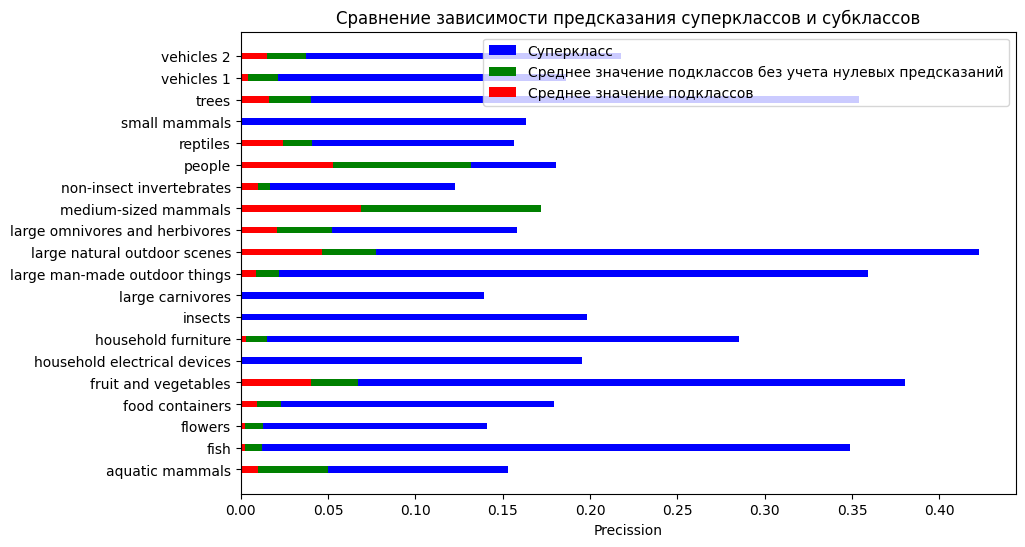

In [155]:
import matplotlib.pyplot as plt

keys = list(avg_deltas.keys())
superclass_values = [item[0] for item in avg_deltas.values()]
avg_values = [item[1] for item in avg_deltas.values()]
avg_non_zero_values = [item[2] for item in avg_deltas.values()]

plt.figure(figsize=(10, 6))
bar_width = 0.3

plt.barh(keys, superclass_values, label='Суперкласс', color='blue', height=bar_width)
plt.barh(keys, avg_non_zero_values, label='Среднее значение подклассов без учета нулевых предсказаний', color='green', height=bar_width)
plt.barh(keys, avg_values, label='Среднее значение подклассов', color='red', height=bar_width)


plt.xlabel('Precission')
plt.title('Сравнение зависимости предсказания суперклассов и субклассов')
plt.legend(loc='upper right')
plt.show()


По графикам видно, что прямой корреляции определения супер и под классов нет. Казалось, что если дообучить подклассы, то зависимость станет яснее, так как подклассов в пять раз больше чем супер классов, но разница в эпохах обучения почти в 10 раз в пользу подклассов и это не помогло добиться среднего уровня точности выше чем в 5 % по сравнению с 21 % для суперклассов. При большем количестве обучающих данных, количестве эпох и лучшей модели можно добиться более высокой точности.